<a href="https://colab.research.google.com/github/mel0ca/Coffee-shop-website/blob/main/Crop_recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')
    # You can then read it like this:
    # data = pd.read_csv(filename)

Saving Crop_recommendation.csv to Crop_recommendation.csv
Uploaded file: Crop_recommendation.csv


In [ ]:
data = pd.read_csv('Crop_recommendation.csv')
print(data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
print('\nInformation about the dataset:')
data.info()

print('\nDescriptive statistics:')
print(data.describe())

data.isnull().sum()

data.duplicated().sum()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Descriptive statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675

np.int64(0)


Distribution of crop labels:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


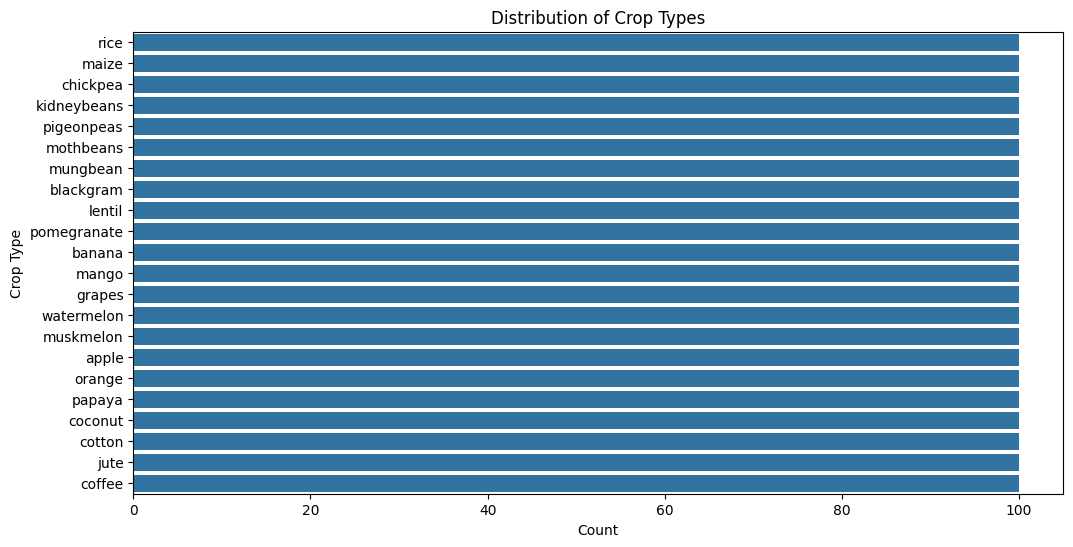

In [ ]:
print('\nDistribution of crop labels:')
print(data['label'].value_counts())

print(data['label'].unique())

plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=data)
plt.title('Distribution of Crop Types')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

In [ ]:
x = data.drop("label", axis=1)
y = data["label"]

labelenc = LabelEncoder()
y_enc = labelenc.fit_transform(y)

x_train,x_test,y_train,y_test = train_test_split(x,y_enc, test_size = 0.2, random_state = 42)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
models = { 'logistic regression' : LogisticRegression(max_iter=1000),
'GaussianNB' : GaussianNB(),
'SVM' : SVC(),
'RadomForest' : RandomForestClassifier(),
'Desiciontree' : DecisionTreeClassifier(),
'ExtraTree' : ExtraTreeClassifier(),
'Gradientboosting' : GradientBoostingClassifier(),
'Adaboost' : AdaBoostClassifier(),
'Bagging' : BaggingClassifier(),
'Kneighbors' : KNeighborsClassifier()
}

In [ ]:
for names,model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'{names} Accuracy: {accuracy:.4f}')
  classification_report(y_test, y_pred)

logistic regression Accuracy: 0.9636
GaussianNB Accuracy: 0.9955
SVM Accuracy: 0.9682
RadomForest Accuracy: 0.9932
Desiciontree Accuracy: 0.9886
ExtraTree Accuracy: 0.8773
Gradientboosting Accuracy: 0.9818
Adaboost Accuracy: 0.1455
Bagging Accuracy: 0.9886
Kneighbors Accuracy: 0.9568


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


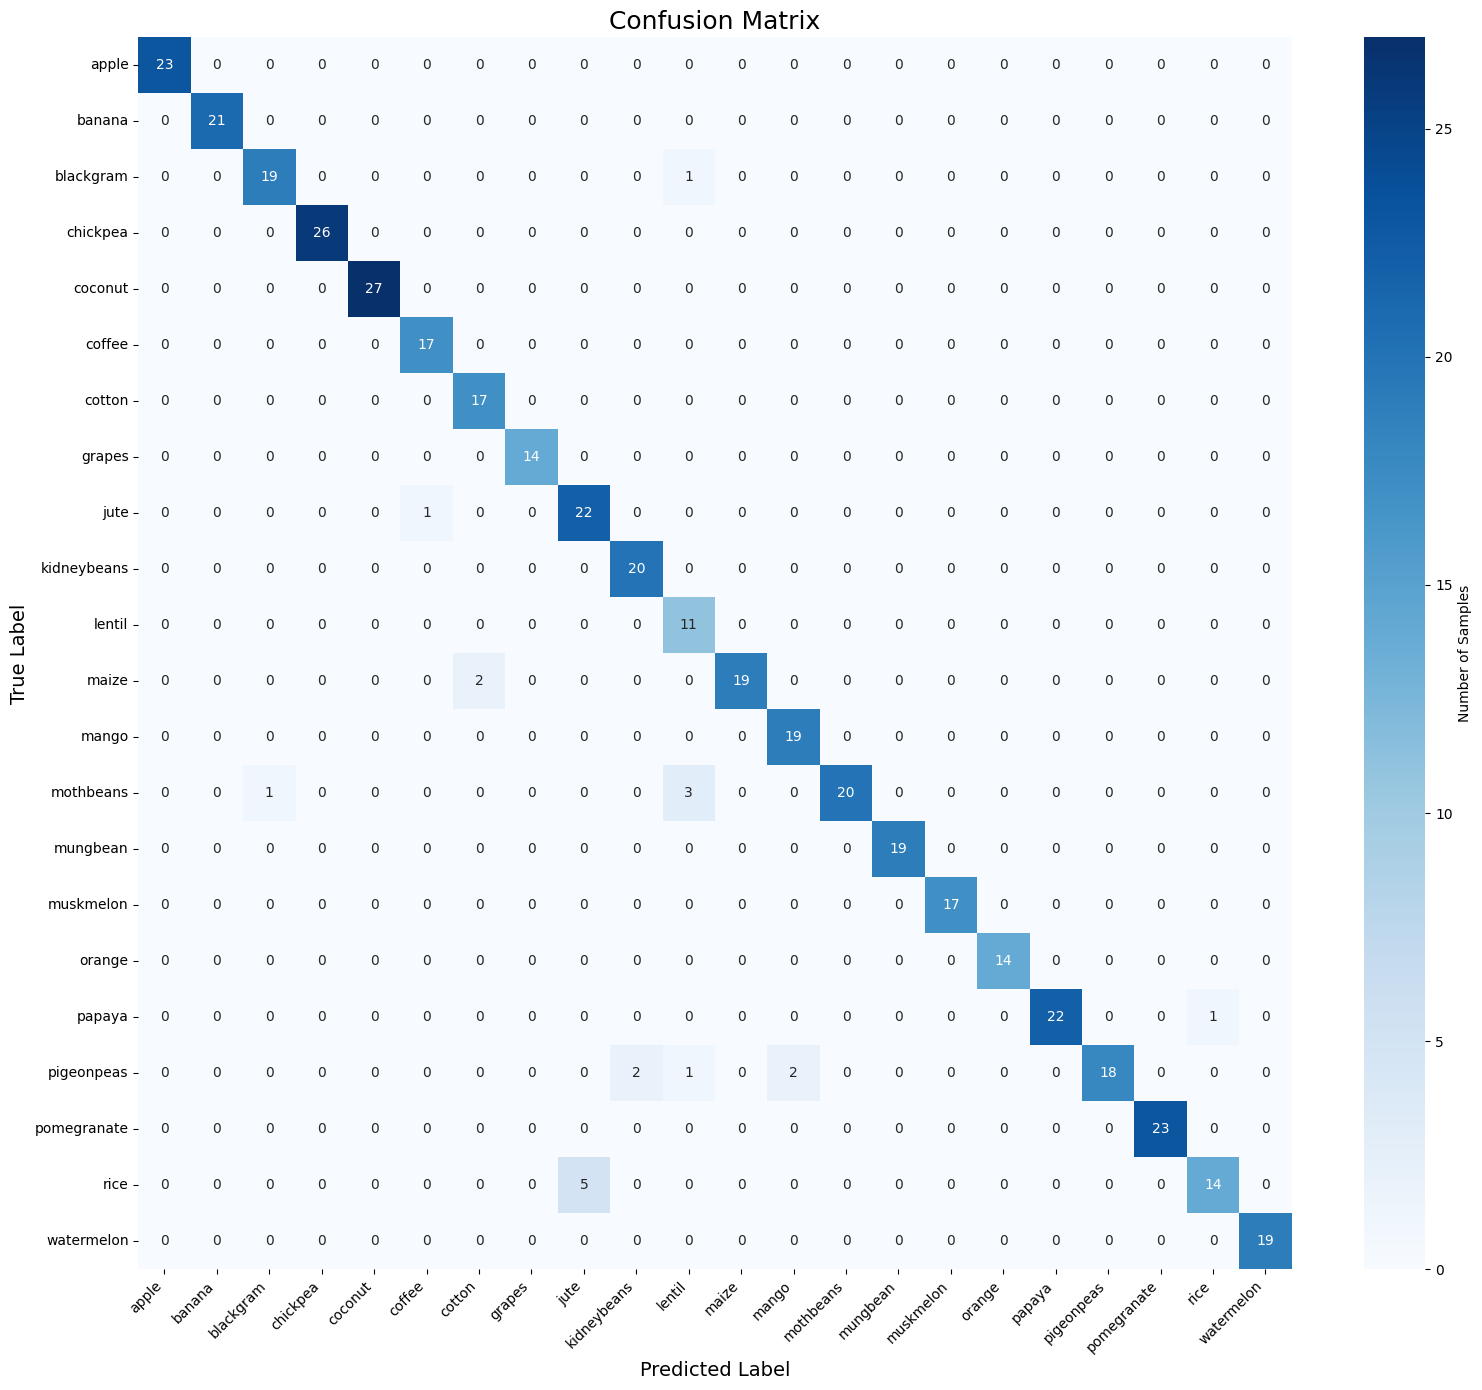

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 14))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labelenc.classes_,
            yticklabels=labelenc.classes_,
            annot_kws={'size': 10},
            cbar_kws={'label': 'Number of Samples'})
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()